In [27]:
from util.experiment_setup import load_model, load_dataset, setup_dataset_transforms
from util.files import find_files_in_folder
from util.training import validate
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
import os.path as osp

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

Using cuda


In [29]:
files_ = ["../models/areadne_submission/spd_large.cfg",
          "../models/areadne_submission/pool_large.cfg",
          "../models/areadne_submission/stride_large.cfg",]
#files_ = find_files_in_folder("../models/mod3_n_channels/", ".cfg")
#files_.extend(["../models/bg_transform/mod3_no_reg_scale0.1-3.5.cfg","../models/bg_transform/mod3_retinal_scale0.1-3.5.cfg", "../models/bg_transform/mod3_bottleneck_scale0.1-3.5.cfg"])

In [30]:
#files_=np.array(files_)[np.array(["no_scale" not in f for f in files_])]

In [31]:
# files_ = find_files_in_folder("../models/mod3_n_channels", ".cfg")
# files_=np.array(files_)[np.array(["_lgn" in f for f in files_])]

In [32]:
model_paths = [f[:-4] for f in files_]
# model_paths = ["../models/bg_transform/mod3_retinal_scale0.1-3.5","../models/bg_transform/mod3_retinal_scale0.1-3.5_r3", "../models/mod3_n_channels/mod3_ch24", "../models/mod3_n_channels/mod3_ch32", "../models/mod3_n_channels/mod3_ch48"]

In [33]:
test_scales = [0.1,0.23,0.37,0.5,0.7,0.9,1,1.1,1.3,1.5,2,2.5,3,3.7]
accuracies = []
test_data = load_dataset(train_data=False, test_data=True, enable_img_transforms=True, min_resize=test_scales[0], max_resize=test_scales[0])
for model_path in model_paths:
    model = load_model(model_path)
    model.to(device)
    model_accs = []
    for scale in tqdm(test_scales):
        transforms = setup_dataset_transforms(enable_img_transforms=True, min_resize=scale, max_resize=scale)
        test_data.transform = transforms
        test_loader = DataLoader(test_data, batch_size=512, shuffle=False)
        model_accs.append(validate(model, test_loader, device, abort_batch=1))
    accuracies.append(model_accs)

Files already downloaded and verified


2it [00:01,  1.52it/s][00:00<?, ?it/s]
  7%|▋         | 1/14 [00:01<00:17,  1.38s/it]


KeyboardInterrupt: 

In [ ]:
for i, path in enumerate(model_paths):
    print(str(i)+": "+ path)

0: ../models/areadne_submission/spd_large
1: ../models/areadne_submission/pool_large
2: ../models/areadne_submission/stride_large


In [ ]:
plot_nos = [i for i in range(len(files_))]#[8,10,0,1,2,3,4]

In [ ]:
x = np.array(test_scales)
y = np.array(accuracies)[plot_nos].T

In [ ]:
colors=[
        (0.2,0.2,0.5),
        (0.2,0.2,0.8),
        (0.5,0.2,0.2),
        (0.8,0.2,0.2),
        (0.2,0.5,0.2),
        (0.2,0.8,0.2),
        (0.2,1,0.2)
        ]
colors.extend(colors)

In [ ]:
import matplotlib as mpl
import palettable
mpl.rcParams['axes.prop_cycle'] = plt.cycler("color", palettable.colorbrewer.qualitative.Paired_10.mpl_colors)

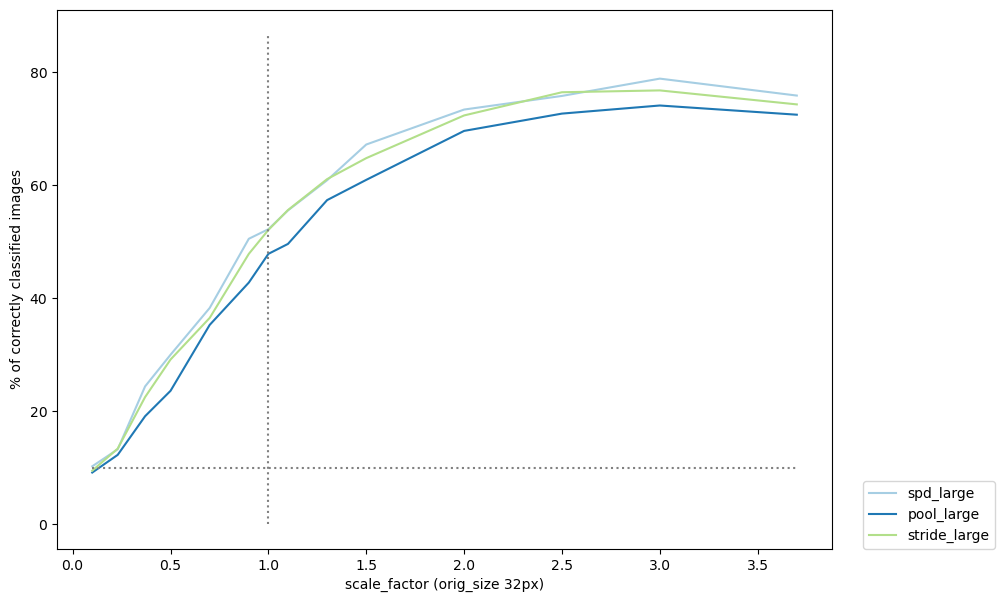

In [ ]:
plt.figure(figsize=(10,7))
for y_, c in zip(y.T, colors):
    plt.plot(x, y_)#, color=c)
plt.vlines(1, 0, y.max()*1.1, colors="grey", linestyles="dotted", label="orig size")
plt.hlines(10, x.min(), x.max(), colors="grey", linestyles="dotted")
plt.legend([osp.split(model_path)[1] for model_path in np.array(model_paths)[plot_nos]], loc=(1.04, 0))
plt.ylabel("% of correctly classified images")
plt.xlabel("scale_factor (orig_size 32px)")
# plt.xscale("log")
plt.show()